# Home Credit Default Risk Analysis
This notebook explores the dataset to understand trends, patterns, and relationships in credit default risk data.

In [22]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data
Load the datasets from Google Drive paths.

In [24]:
# Load datasets
train = pd.read_csv('/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/application_test.csv')

train_df = train.copy()

# desc = pd.read_csv('/content/drive/MyDrive/UMD/DATA602_DATA_Science/Project/home-credit-default-risk/HomeCredit_columns_description.csv')

## Initial Data Overview
Explore basic structure and summary statistics of the training data.

In [25]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [26]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Target Variable Distribution
Visualize the distribution of the target variable to see the ratio of defaults (1) and non-defaults (0).

<ipython-input-27-a120b1aeb57d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=train, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


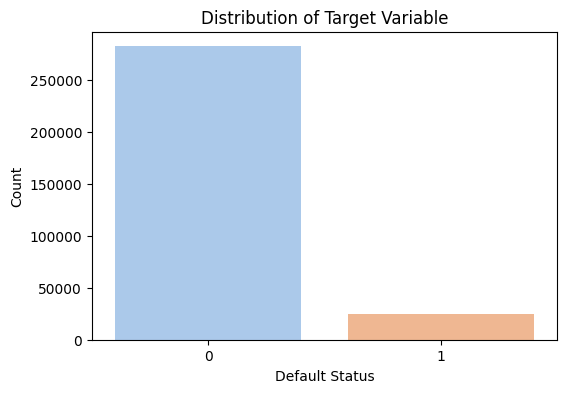

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=train, palette='pastel')
plt.title('Distribution of Target Variable')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

## Income, Credit, and Annuity Distributions
Explore distributions of key financial features to understand the spread of client income, credit amount, and annuity.

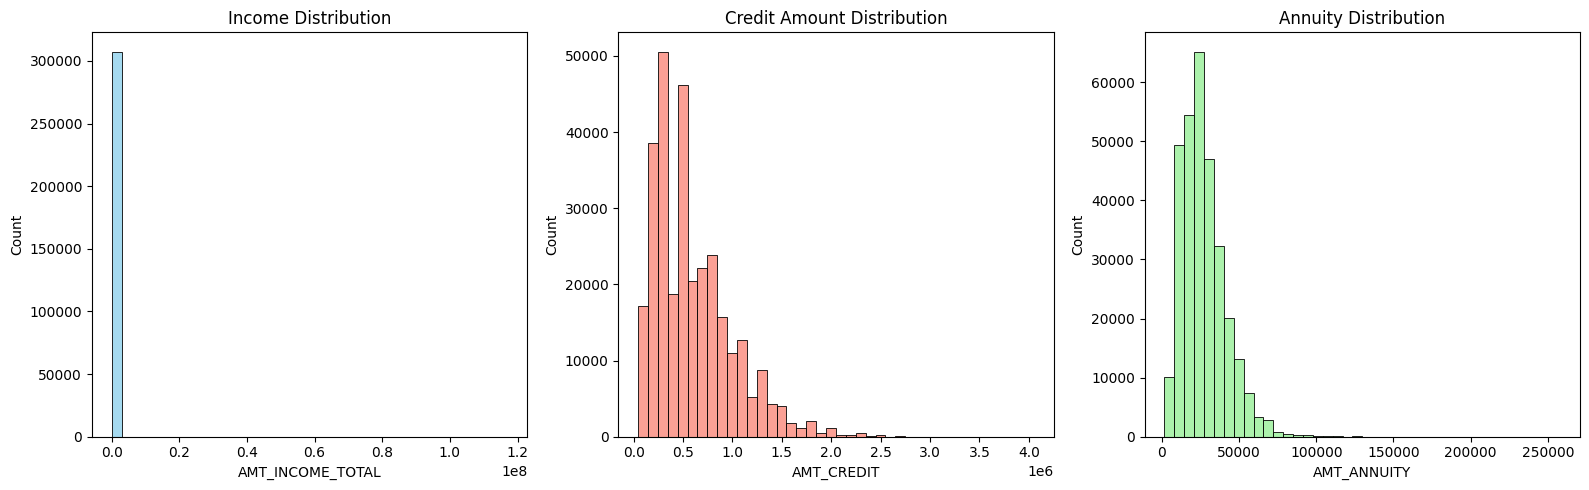

In [28]:
plt.figure(figsize=(16, 5))
# Income distribution
plt.subplot(1, 3, 1)
sns.histplot(train['AMT_INCOME_TOTAL'], bins=40, color='skyblue')
plt.title('Income Distribution')
# Credit amount distribution
plt.subplot(1, 3, 2)
sns.histplot(train['AMT_CREDIT'], bins=40, color='salmon')
plt.title('Credit Amount Distribution')
# Annuity amount distribution
plt.subplot(1, 3, 3)
sns.histplot(train['AMT_ANNUITY'], bins=40, color='lightgreen')
plt.title('Annuity Distribution')
plt.tight_layout()
plt.show()

## Correlation Analysis
Compute and display correlations among key features, focusing on the target variable.

In [29]:
# Identify non-numeric columns
non_numeric_columns = train.select_dtypes(include=['object']).columns
print("Categorical Columns:", non_numeric_columns)


Categorical Columns: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [30]:
# One-hot encode categorical columns
train = pd.get_dummies(train, columns=non_numeric_columns, drop_first=True)


In [31]:
correlations = train.corr()
plt.figure(figsize=(100, 80))
sns.heatmap(correlations, cmap='mako', annot=False)
plt.title('Correlation Matrix')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Top Correlations with Target
List the top correlations of features with the target variable to identify strong relationships.

In [32]:
target_corr = correlations['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)[:10]
target_corr

,TARGET
EXT_SOURCE_3,-0.178919
EXT_SOURCE_2,-0.160472
EXT_SOURCE_1,-0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
NAME_INCOME_TYPE_Working,0.057481
NAME_EDUCATION_TYPE_Higher education,-0.056593
DAYS_LAST_PHONE_CHANGE,0.055218
CODE_GENDER_M,0.054713


<ipython-input-33-43aa4c481f98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='mako')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

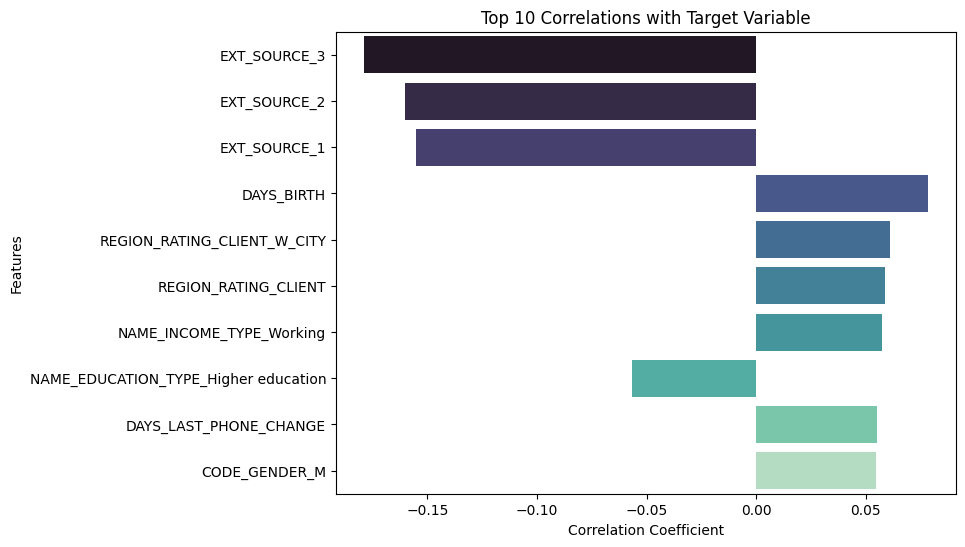

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='mako')
plt.title("Top 10 Correlations with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

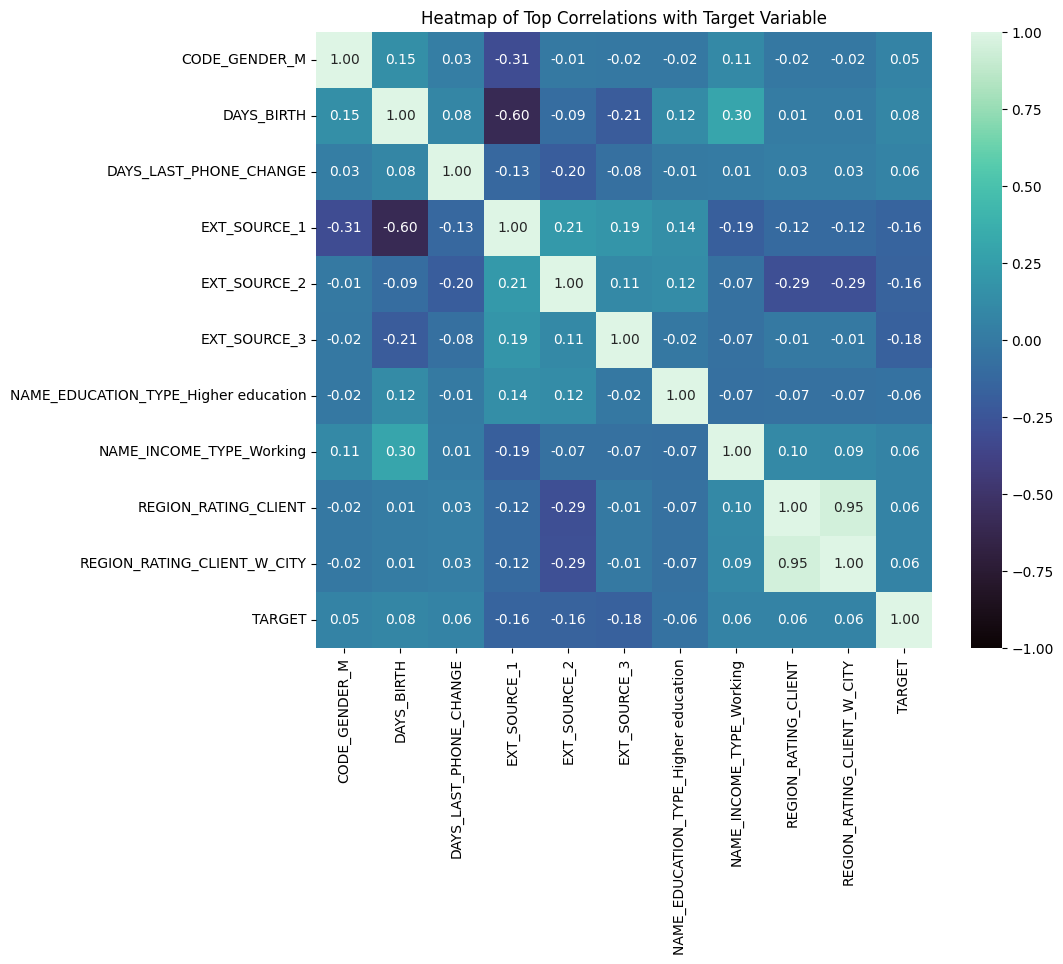

In [34]:
top_features = correlations['TARGET'].drop('TARGET').sort_values(key=abs, ascending=False)[:10].index
top_corr_matrix = correlations.loc[top_features.union(['TARGET']), top_features.union(['TARGET'])]
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1, fmt=".2f", square=True)
plt.title("Heatmap of Top Correlations with Target Variable")
plt.show()

In [35]:

# Calculate the correlation matrix
correlations = train.corr()

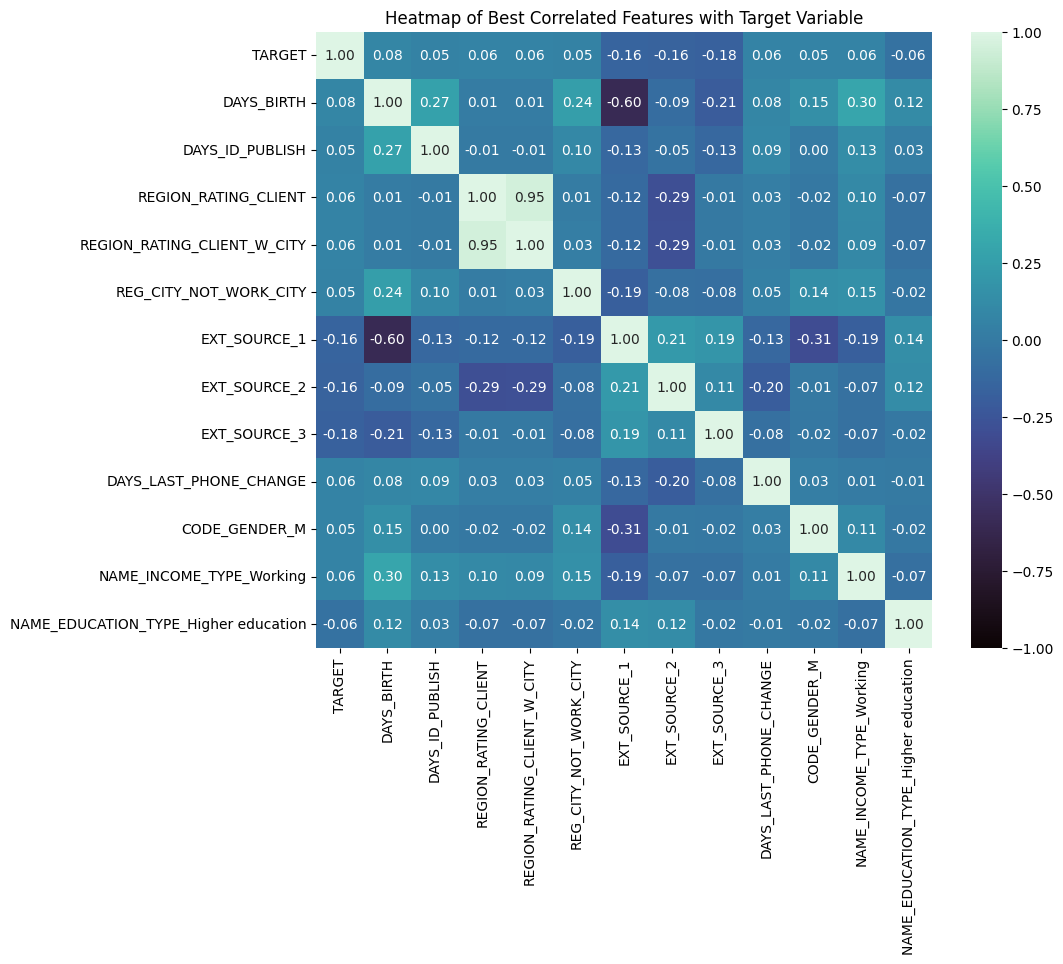

In [36]:


# Set a threshold for selecting strong correlations
threshold = 0.05

# Select features with correlations above the threshold with the target
best_features = correlations['TARGET'][abs(correlations['TARGET']) > threshold].index

# Create a subset of the correlation matrix with these features and the target
best_corr_matrix = correlations.loc[best_features, best_features]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(best_corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1, fmt=".2f", square=True)
plt.title("Heatmap of Best Correlated Features with Target Variable")
plt.show()


## Debt-to-Income Ratio and Income per Child
Create new features for deeper analysis:
- **Debt-to-Income Ratio**: The ratio of credit amount to total income.
- **Income per Child**: Total income divided by the number of children, providing insights into financial dependability.

In [37]:
train['debt_income_ratio'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']
train['income_per_child'] = train['AMT_INCOME_TOTAL'] / (1 + train['CNT_CHILDREN'])

## Debt-to-Income Ratio by Default Status
Visualize the distribution of the debt-to-income ratio across default and non-default clients.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


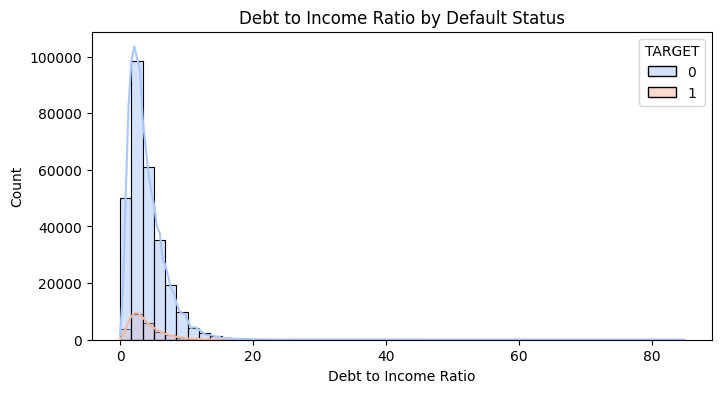

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(x='debt_income_ratio', hue='TARGET', data=train, bins=50, kde=True, palette='coolwarm')
plt.title('Debt to Income Ratio by Default Status')
plt.xlabel('Debt to Income Ratio')
plt.show()

## Children Count by Default Status
Analyze the distribution of the number of children by default status, providing insights into financial responsibilities.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


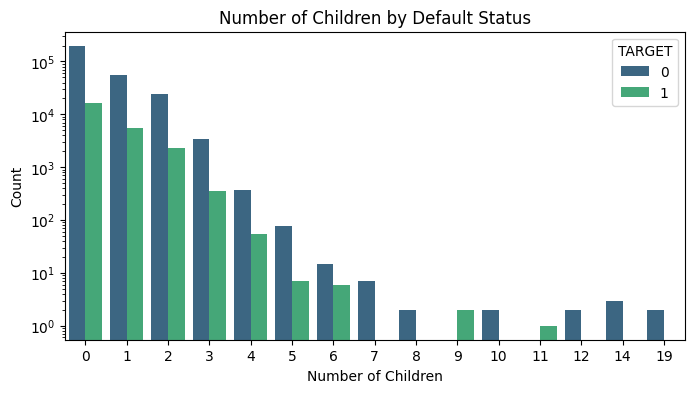

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=train, palette='viridis')
plt.title('Number of Children by Default Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## Missing Values
Check for missing values in each column to identify features that may require imputation or removal.

In [40]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

,0
COMMONAREA_MODE,214865
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
NONLIVINGAPARTMENTS_MEDI,213514
NONLIVINGAPARTMENTS_MODE,213514
...,...
EXT_SOURCE_2,660
AMT_GOODS_PRICE,278
AMT_ANNUITY,12
CNT_FAM_MEMBERS,2


## Gender and Default Association

**Hypothesis**: Default rates differ by gender.

**Null Hypothesis** (**H0**): There is no association between gender and loan default status.

**Alternative Hypothesis** (**H1**): There is an association between gender and loan default status.

Test: Chi-Square Test for Independence.

In [41]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
# train_df = train.copy()
#
# train_df.columns.to_list()

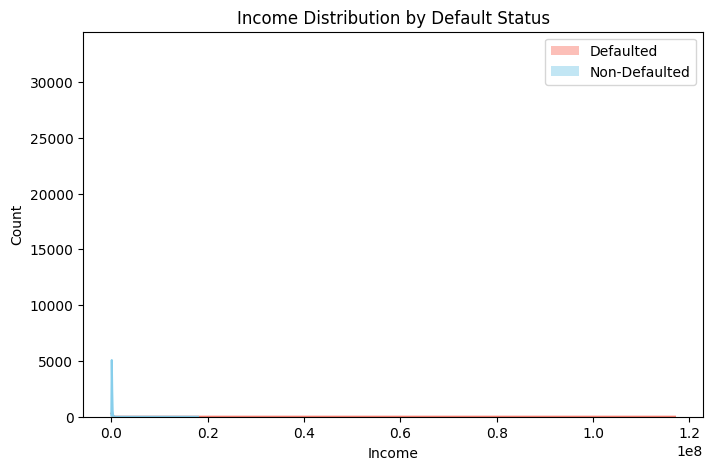

T-Test for Income Levels and Default Likelihood
T-Statistic: -0.7307, P-Value: 0.4650
Result: Fail to reject the null hypothesis (no significant difference in income levels).


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


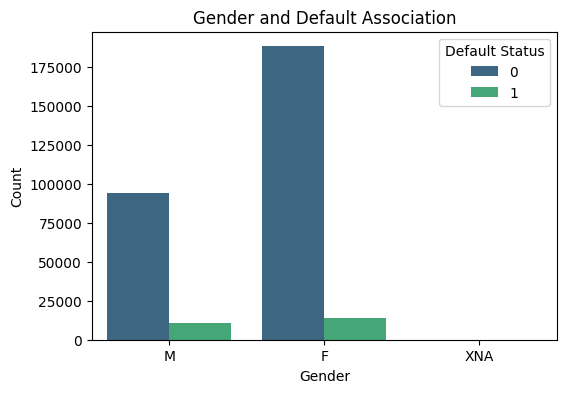


Chi-Square Test for Gender and Default Association
Chi2 Statistic: 920.7913, P-Value: 0.0000
Result: Reject the null hypothesis (significant association between gender and default status).


In [44]:


# Split data for T-Test: Income levels between defaulters and non-defaulters
defaulted_income = train_df[train_df['TARGET'] == 1]['AMT_INCOME_TOTAL']
non_defaulted_income = train_df[train_df['TARGET'] == 0]['AMT_INCOME_TOTAL']

# Perform T-test
t_stat, p_val_income = ttest_ind(defaulted_income, non_defaulted_income, equal_var=False)

# Plot results for income
plt.figure(figsize=(8, 5))
sns.histplot(defaulted_income, color='salmon', label='Defaulted', kde=True)
sns.histplot(non_defaulted_income, color='skyblue', label='Non-Defaulted', kde=True)
plt.title("Income Distribution by Default Status")
plt.xlabel("Income")
plt.legend()
plt.show()

print("T-Test for Income Levels and Default Likelihood")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val_income:.4f}")
if p_val_income < 0.05:
    print("Result: Reject the null hypothesis (significant difference in income levels between defaulters and non-defaulters).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference in income levels).")

# Chi-Square Test: Association between Gender and Default Status
gender_contingency = pd.crosstab(train_df['CODE_GENDER'], train_df['TARGET'])#CODE_GENDER_M
chi2, p_val_gender, dof, expected = chi2_contingency(gender_contingency)

# Plot results for gender vs. default
plt.figure(figsize=(6, 4))
sns.countplot(x='CODE_GENDER_M', hue='TARGET', data=train_df, palette='viridis')#CODE_GENDER_M
plt.title("Gender and Default Association")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Default Status')
plt.show()

print("\nChi-Square Test for Gender and Default Association")
print(f"Chi2 Statistic: {chi2:.4f}, P-Value: {p_val_gender:.4f}")
if p_val_gender < 0.05:
    print("Result: Reject the null hypothesis (significant association between gender and default status).")
else:
    print("Result: Fail to reject the null hypothesis (no significant association between gender and default status).")


 Income Level and Default Likelihood

Hypothesis: Clients with lower income levels are more likely to default.

Null Hypothesis (H0): There is no significant difference in income levels between clients who default and those who don’t.

Alternative Hypothesis (H1): There is a significant difference in income levels between clients who default and those who don’t.

Test: Independent Samples T-Test.

In [45]:
from scipy.stats import ttest_ind

# Split income data based on target variable
defaulted_income = train_df[train_df['TARGET'] == 1]['AMT_INCOME_TOTAL']
non_defaulted_income = train_df[train_df['TARGET'] == 0]['AMT_INCOME_TOTAL']

# Perform T-test
t_stat, p_val = ttest_ind(defaulted_income, non_defaulted_income, equal_var=False)
print("T-Test for Income Levels and Default Likelihood")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")


T-Test for Income Levels and Default Likelihood
T-Statistic: -0.7307, P-Value: 0.4650


If the p-value is below 0.05, we reject the null hypothesis, indicating a significant association between gender and default statu

## Education Level and Income

**Hypothesis**: Clients with higher education levels have higher average income.

**Null Hypothesis (H0)**: There is no significant difference in income based on education level.

**Alternative Hypothesis (H1)**: Income significantly varies by education level.

**Test**: ANOVA (Analysis of Variance).

Code to Perform ANOVA:

In [46]:
from scipy.stats import f_oneway

# Group incomes by education type
education_groups = [group['AMT_INCOME_TOTAL'].values for name, group in train_df.groupby('NAME_EDUCATION_TYPE')]

# Perform ANOVA
f_stat, p_val = f_oneway(*education_groups)
print("ANOVA for Income by Education Level")
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")


ANOVA for Income by Education Level
F-Statistic: 753.2160, P-Value: 0.0000


Employment Length and Default Likelihood
Hypothesis: Clients with shorter employment durations are more likely to default.
Null Hypothesis (H0): There is no significant difference in employment duration between clients who default and those who don’t.
Alternative Hypothesis (H1): There is a significant difference in employment duration between clients who default and those who don’t.
Test: Independent Samples T-Test on DAYS_EMPLOYED (employment length in days).

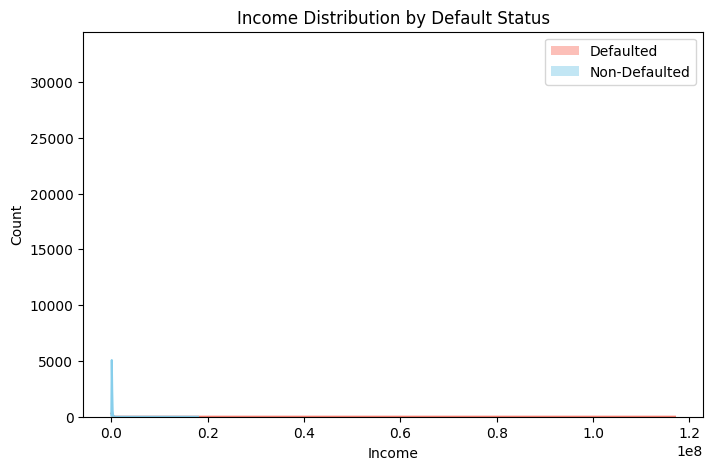

T-Test for Income Levels and Default Likelihood
T-Statistic: -0.7307, P-Value: 0.4650
Result: Fail to reject the null hypothesis (no significant difference in income levels).


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


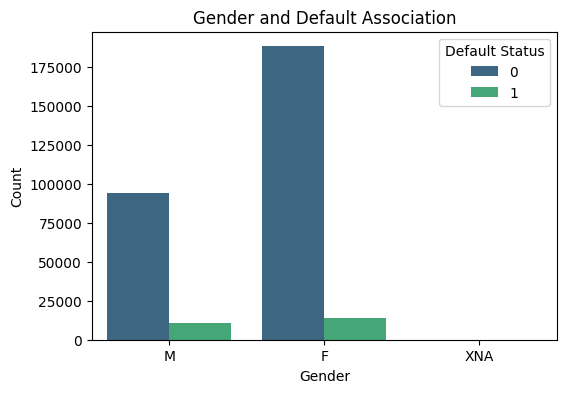


Chi-Square Test for Gender and Default Association
Chi2 Statistic: 920.7913, P-Value: 0.0000
Result: Reject the null hypothesis (significant association between gender and default status).


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Split data for T-Test: Income levels between defaulters and non-defaulters
defaulted_income = train_df[train_df['TARGET'] == 1]['AMT_INCOME_TOTAL']
non_defaulted_income = train_df[train_df['TARGET'] == 0]['AMT_INCOME_TOTAL']

# Perform T-test
t_stat, p_val_income = ttest_ind(defaulted_income, non_defaulted_income, equal_var=False)

# Plot results for income
plt.figure(figsize=(8, 5))
sns.histplot(defaulted_income, color='salmon', label='Defaulted', kde=True)
sns.histplot(non_defaulted_income, color='skyblue', label='Non-Defaulted', kde=True)
plt.title("Income Distribution by Default Status")
plt.xlabel("Income")
plt.legend()
plt.show()

print("T-Test for Income Levels and Default Likelihood")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val_income:.4f}")
if p_val_income < 0.05:
    print("Result: Reject the null hypothesis (significant difference in income levels between defaulters and non-defaulters).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference in income levels).")

# Chi-Square Test: Association between Gender and Default Status
gender_contingency = pd.crosstab(train_df['CODE_GENDER'], train_df['TARGET'])
chi2, p_val_gender, dof, expected = chi2_contingency(gender_contingency)

# Plot results for gender vs. default
plt.figure(figsize=(6, 4))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=train_df, palette='viridis')
plt.title("Gender and Default Association")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Default Status')
plt.show()

print("\nChi-Square Test for Gender and Default Association")
print(f"Chi2 Statistic: {chi2:.4f}, P-Value: {p_val_gender:.4f}")
if p_val_gender < 0.05:
    print("Result: Reject the null hypothesis (significant association between gender and default status).")
else:
    print("Result: Fail to reject the null hypothesis (no significant association between gender and default status).")


Employment Length and Default Likelihood
Hypothesis: Clients with shorter employment durations are more likely to default.
Null Hypothesis (H0): There is no significant difference in employment duration between clients who default and those who don’t.
Alternative Hypothesis (H1): There is a significant difference in employment duration between clients who default and those who don’t.
Test: Independent Samples T-Test on DAYS_EMPLOYED (employment length in days).

In [48]:
from scipy.stats import ttest_ind

# Separate employment length data for defaulted and non-defaulted clients
defaulted_emp = train_df[train_df['TARGET'] == 1]['DAYS_EMPLOYED'].abs()
non_defaulted_emp = train_df[train_df['TARGET'] == 0]['DAYS_EMPLOYED'].abs()

# Perform T-test
t_stat, p_val_emp = ttest_ind(defaulted_emp, non_defaulted_emp, equal_var=False)
print("T-Test for Employment Length and Default Likelihood")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val_emp:.4f}")

# Interpretation
if p_val_emp < 0.05:
    print("Result: Reject the null hypothesis (significant difference in employment length between groups).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference in employment length).")


T-Test for Employment Length and Default Likelihood
T-Statistic: -30.2419, P-Value: 0.0000
Result: Reject the null hypothesis (significant difference in employment length between groups).


Number of Children and Default Likelihood
Hypothesis: Clients with more children are more likely to default.
Null Hypothesis (H0): There is no association between the number of children and default likelihood.
Alternative Hypothesis (H1): There is an association between the number of children and default likelihood.
Test: Chi-Square Test for Independence on CNT_CHILDREN.

In [49]:
from scipy.stats import chi2_contingency

# Create a contingency table
children_contingency = pd.crosstab(train_df['CNT_CHILDREN'], train_df['TARGET'])

# Perform chi-square test
chi2, p_val_children, dof, expected = chi2_contingency(children_contingency)
print("Chi-Square Test for Number of Children and Default Likelihood")
print(f"Chi2 Statistic: {chi2:.4f}, P-Value: {p_val_children:.4f}")

# Interpretation
if p_val_children < 0.05:
    print("Result: Reject the null hypothesis (significant association between number of children and default likelihood).")
else:
    print("Result: Fail to reject the null hypothesis (no significant association).")


Chi-Square Test for Number of Children and Default Likelihood
Chi2 Statistic: 185.4518, P-Value: 0.0000
Result: Reject the null hypothesis (significant association between number of children and default likelihood).


Annuity Amount and Loan Default
Hypothesis: Higher annuity amounts are associated with a higher likelihood of default.
Null Hypothesis (H0): There is no significant difference in annuity amount between clients who default and those who don’t.
Alternative Hypothesis (H1): There is a significant difference in annuity amount between clients who default and those who don’t.
Test: Independent Samples T-Test on AMT_ANNUITY.

In [50]:
# Separate annuity data for defaulted and non-defaulted clients
defaulted_annuity = train_df[train_df['TARGET'] == 1]['AMT_ANNUITY']
non_defaulted_annuity = train_df[train_df['TARGET'] == 0]['AMT_ANNUITY']

# Perform T-test
t_stat, p_val_annuity = ttest_ind(defaulted_annuity.dropna(), non_defaulted_annuity.dropna(), equal_var=False)
print("T-Test for Annuity Amount and Default Likelihood")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val_annuity:.4f}")

# Interpretation
if p_val_annuity < 0.05:
    print("Result: Reject the null hypothesis (significant difference in annuity amount between groups).")
else:
    print("Result: Fail to reject the null hypothesis (no significant difference in annuity amount).")


T-Test for Annuity Amount and Default Likelihood
T-Statistic: -8.1473, P-Value: 0.0000
Result: Reject the null hypothesis (significant difference in annuity amount between groups).
